# Paper ST Sloping - 4 beats

## Setup

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.metrics import specificity_score
import random
import time

In [2]:
THREADS_TO_USE = 4

## Load dataset

In [3]:
data = pd.read_csv('../dataset/st_dataset_4beats.csv')
data = data.dropna()
data.head()

,id,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,...,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16,label
0,e0106,13.102095,13.097001,13.072790,3.706391,0.542614,1.240982,-0.895934,-2.712703,-2.663057,...,-0.069056,0.062074,-0.071315,0.072003,-0.085813,0.018093,-0.024765,-0.023205,0.019933,NSR
1,e0106,17.487040,17.476616,17.514101,4.949534,0.713287,1.208352,-0.835234,-1.803925,-2.177733,...,-0.033026,0.017482,-0.014863,0.016572,-0.072260,0.024719,-0.037654,-0.001608,-0.009617,NSR
2,e0106,17.765692,18.767421,18.563219,5.234889,0.756572,1.239086,-0.727071,-1.738814,-2.078783,...,-0.036041,0.011065,-0.006174,0.017821,-0.030732,-0.027515,-0.018567,0.002476,-0.011823,NSR
3,e0106,17.472889,18.368493,18.044299,5.083577,0.745658,1.200223,-0.800412,-1.813089,-2.117043,...,-0.013610,-0.003827,-0.018916,0.046067,-0.068930,0.005377,-0.029879,0.006491,-0.021803,NSR
4,e0106,16.631755,17.107590,16.986173,4.785861,0.705577,1.207803,-0.814830,-1.677964,-1.684348,...,-0.050212,0.021235,-0.011183,0.030903,-0.061186,-0.018751,0.003333,-0.020661,0.007397,NSR


In [4]:
data['label'].replace("ST-", "ST", inplace=True)
data['label'].replace("ST+", "ST", inplace=True)

In [5]:
data['label'].value_counts()

NSR    104876
ST      31872
Name: label, dtype: int64

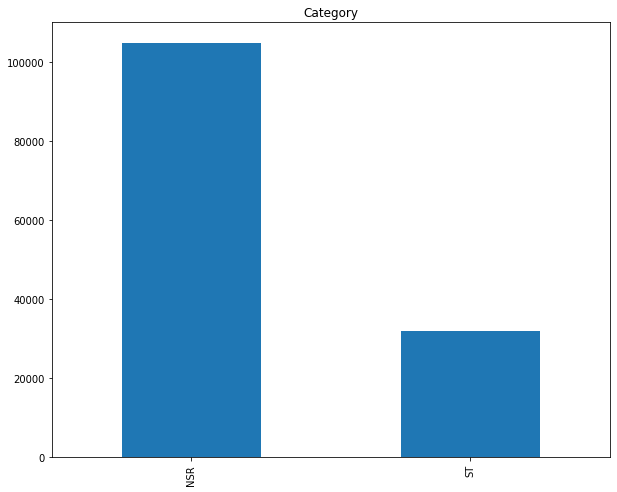

In [6]:
data['label'].value_counts().plot(kind='bar', title='Category', figsize=(10,8))
plt.show()

In [7]:
data.corr()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,mfw_5,...,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15,cfr_16
dw_1,1.000000,0.312273,0.162467,0.110289,0.114818,0.091114,-0.029557,0.006399,-0.000875,0.001703,...,-0.042191,-0.050062,-0.008514,0.005894,0.015042,-0.023458,-0.014237,-0.036773,-0.059384,-0.038783
dw_2,0.312273,1.000000,0.840060,0.440370,0.158646,0.415202,-0.437598,-0.206089,-0.003727,0.005025,...,-0.143619,0.102186,0.218697,0.162054,0.045198,0.025353,0.101591,-0.013728,-0.121356,-0.078300
dw_3,0.162467,0.840060,1.000000,0.613108,0.233954,0.305744,-0.499972,-0.269989,-0.004282,0.002581,...,-0.201584,0.090697,0.252037,0.115305,-0.043451,0.034627,0.045318,-0.033912,-0.133216,-0.044818
dw_4,0.110289,0.440370,0.613108,1.000000,0.900298,0.029004,-0.221348,-0.125818,-0.001509,0.000622,...,-0.139370,0.027890,0.115591,0.036784,-0.040897,0.031590,0.027101,-0.027459,-0.083792,-0.027346
dw_5,0.114818,0.158646,0.233954,0.900298,1.000000,-0.093747,-0.013018,-0.014289,0.000039,-0.000191,...,-0.065101,-0.007436,0.022364,0.006044,-0.015060,0.013505,0.011685,-0.024332,-0.037581,-0.015057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cfr_12,-0.023458,0.025353,0.034627,0.031590,0.013505,-0.078775,0.021517,0.061659,0.000381,0.003797,...,-0.114312,-0.205332,-0.130827,-0.012334,0.047726,1.000000,-0.024143,-0.054066,-0.277308,-0.170496
cfr_13,-0.014237,0.101591,0.045318,0.027101,0.011685,0.077259,0.004550,0.003053,-0.000895,0.001937,...,0.110173,0.020152,-0.217039,-0.265132,-0.093551,-0.024143,1.000000,0.126068,0.040084,-0.170708
cfr_14,-0.036773,-0.013728,-0.033912,-0.027459,-0.024332,0.014857,0.010542,0.014576,-0.000553,0.000869,...,0.077729,0.198416,0.039598,-0.185391,-0.289586,-0.054066,0.126068,1.000000,0.090389,-0.160650
cfr_15,-0.059384,-0.121356,-0.133216,-0.083792,-0.037581,0.017184,0.080945,0.046306,0.003503,-0.004316,...,0.231845,0.160889,-0.064172,-0.148376,-0.122505,-0.277308,0.040084,0.090389,1.000000,0.127273


In [8]:
y = data['label'].values
X = data.loc[:, ~data.columns.isin(["id", "label"])].copy()

In [9]:
label_encoder = LabelEncoder().fit(y)
y = label_encoder.transform(y)

## Feature selection

### Exclude features with corr > 0.95

In [10]:
correlated_features = set()
correlation_matrix = X.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [11]:
print(correlated_features)

{'fft_255', 'fft_170', 'fft_189', 'fft_200', 'fft_205', 'fft_245', 'fft_222', 'fft_149', 'fft_176', 'fft_231', 'fft_133', 'fft_132', 'fft_193', 'fft_156', 'fft_196', 'mfw_16', 'fft_219', 'fft_148', 'fft_213', 'fft_150', 'fft_254', 'fft_131', 'fft_230', 'fft_151', 'fft_177', 'fft_198', 'fft_240', 'fft_201', 'mfw_10', 'fft_183', 'fft_153', 'fft_187', 'fft_203', 'fft_186', 'fft_165', 'fft_135', 'fft_229', 'fft_181', 'fft_168', 'mfw_15', 'fft_251', 'fft_243', 'fft_155', 'fft_220', 'fft_241', 'fft_235', 'fft_228', 'fft_232', 'fft_253', 'fft_144', 'fft_244', 'fft_140', 'fft_161', 'fft_194', 'fft_184', 'fft_174', 'fft_224', 'fft_143', 'fft_185', 'fft_173', 'fft_246', 'fft_233', 'mfw_11', 'fft_250', 'fft_134', 'fft_141', 'fft_204', 'fft_239', 'fft_178', 'fft_130', 'fft_146', 'fft_163', 'fft_238', 'fft_162', 'fft_248', 'mfw_14', 'fft_160', 'fft_209', 'fft_214', 'fft_154', 'fft_166', 'fft_223', 'mfw_5', 'mfw_6', 'fft_171', 'fft_218', 'mfw_13', 'fft_137', 'fft_211', 'fft_242', 'fft_226', 'fft_234

### Random forest embeded for features selection

In [12]:
cols_no_corr = [col for col in X.columns if col not in correlated_features]

In [13]:
embeded_rf_selector = SelectFromModel(RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE), threshold='1.25*median')
embeded_rf_selector.fit(X[cols_no_corr], y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=4, random_state=101),
                threshold='1.25*median')

In [14]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X[cols_no_corr].loc[:,embeded_rf_support].columns.tolist()

print('\n'.join(embeded_rf_feature), '\nselected features:', len(embeded_rf_feature))

dw_1
dw_2
dw_3
dw_4
dw_5
mfw_1
mfw_2
mfw_3
mfw_4
fft_1
fft_2
fft_3
fft_4
fft_5
fft_6
fft_7
fft_8
fft_9
fft_10
fft_11
fft_12
fft_13
fft_14
fft_15
fft_16
fft_17
fft_18
fft_19
fft_20
fft_21
fft_22
fft_23
fft_24
fft_25
fft_26
fft_27
fft_28
fft_29
fft_30
fft_31
fft_32
fft_33
fft_34
fft_35
fft_36
fft_37
fft_38
fft_39
fft_40
ar_1
ar_2
ar_3
ar_4
ar_5
ar_6
ar_7
ar_8
ar_9
ar_10
ar_16
var
cfr_1
cfr_2
cfr_3
cfr_4
cfr_5
cfr_6
cfr_7
cfr_8
cfr_9
cfr_10
cfr_11
cfr_12
cfr_13
cfr_14
cfr_15 
selected features: 76


### Visualization best features

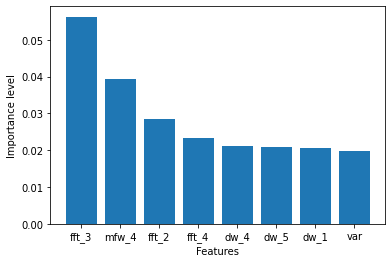

In [15]:
features_dict = dict(zip(cols_no_corr, embeded_rf_selector.estimator_.feature_importances_))
features_dict = dict(sorted(features_dict.items(), key=lambda item: item[1], reverse=True))

best_features = dict()
for index, (key, value) in enumerate(features_dict.items()):
    if index < 8:
        best_features[key] = value

plt.bar(range(len(best_features)), list(best_features.values()), align='center', )
plt.xticks(ticks=range(len(best_features)), labels=best_features.keys())
plt.xlabel('Features')
plt.ylabel('Importance level')
plt.show()

## Filter features

In [16]:
X_fsel = X[embeded_rf_feature]
X_fsel.head()

,dw_1,dw_2,dw_3,dw_4,dw_5,mfw_1,mfw_2,mfw_3,mfw_4,fft_1,...,cfr_6,cfr_7,cfr_8,cfr_9,cfr_10,cfr_11,cfr_12,cfr_13,cfr_14,cfr_15
0,13.102095,13.097001,13.072790,3.706391,0.542614,1.240982,-0.895934,-2.712703,-2.663057,0.294201,...,-0.013426,0.064171,-0.069056,0.062074,-0.071315,0.072003,-0.085813,0.018093,-0.024765,-0.023205
1,17.487040,17.476616,17.514101,4.949534,0.713287,1.208352,-0.835234,-1.803925,-2.177733,-1.533708,...,0.016671,0.036579,-0.033026,0.017482,-0.014863,0.016572,-0.072260,0.024719,-0.037654,-0.001608
2,17.765692,18.767421,18.563219,5.234889,0.756572,1.239086,-0.727071,-1.738814,-2.078783,-0.720965,...,0.020868,0.035213,-0.036041,0.011065,-0.006174,0.017821,-0.030732,-0.027515,-0.018567,0.002476
3,17.472889,18.368493,18.044299,5.083577,0.745658,1.200223,-0.800412,-1.813089,-2.117043,0.838703,...,0.026449,0.028665,-0.013610,-0.003827,-0.018916,0.046067,-0.068930,0.005377,-0.029879,0.006491
4,16.631755,17.107590,16.986173,4.785861,0.705577,1.207803,-0.814830,-1.677964,-1.684348,-0.600837,...,-0.015116,0.060441,-0.050212,0.021235,-0.011183,0.030903,-0.061186,-0.018751,0.003333,-0.020661


## Random Forest - 1000x random split

In [17]:
classes = np.unique(label_encoder.inverse_transform(y))

result_df = pd.DataFrame()

seeds = random.sample(range(1, 2**32 - 1), 1000)
for i, seed in enumerate(seeds):
    start_time = time.time()

    # Train and Test split
    x_train, x_test, y_train, y_test = train_test_split(X_fsel, y, test_size=0.2, random_state=seed)

    # Training
    model = RandomForestClassifier(random_state=101, n_jobs=THREADS_TO_USE).fit(x_train, y_train)

    # Prediction
    y_pred = model.predict(x_test)

    # Decode
    y_test_dec = label_encoder.inverse_transform(y_test)
    y_pred_dec = label_encoder.inverse_transform(y_pred)

    # get metrics
    report = classification_report(y_true=y_test_dec, y_pred=y_pred_dec, output_dict=True)
    specificity = specificity_score(y_true=y_test_dec, y_pred=y_pred_dec, average="weighted")

    acc = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']


    # save result in result_df
    result_df = result_df.append({
        "accuracy": acc,
        "specificity": specificity,
        "precision": precision,
        "recall": recall,
        "f1": f1
     }, ignore_index=True)
    end_time = time.time()

    elapsed_seconds = end_time - start_time
    # Log result
    print("#---------------------#")
    print(i+1, "of", len(seeds), "-", elapsed_seconds, "s")
    print("Accuracy", acc, "precision", precision, "specificity", specificity, "recall", recall, "f1", f1)
    print("#---------------------#")

#---------------------#
1 of 1000 - 37.62497091293335 s
Accuracy 0.9275319926873857 precision 0.9273096372936104 specificity 0.8077854780333081 recall 0.9275319926873857 f1 0.9248782923709613
#---------------------#
#---------------------#
2 of 1000 - 37.052969217300415 s
Accuracy 0.9283363802559415 precision 0.9279923248403605 specificity 0.811835748728045 recall 0.9283363802559415 f1 0.9258350619183233
#---------------------#
#---------------------#
3 of 1000 - 37.20896887779236 s
Accuracy 0.933564899451554 precision 0.933034197019557 specificity 0.8224239485148233 recall 0.933564899451554 f1 0.931466842448682
#---------------------#
#---------------------#
4 of 1000 - 36.79996871948242 s
Accuracy 0.9297623400365631 precision 0.9295504571977131 specificity 0.8119278004445359 recall 0.9297623400365631 f1 0.927248202782788
#---------------------#
#---------------------#
5 of 1000 - 36.87197160720825 s
Accuracy 0.9290676416819013 precision 0.9290100146621005 specificity 0.80842661572313

In [18]:
result_df.head(10)

,accuracy,specificity,precision,recall,f1
0,0.927532,0.807785,0.927310,0.927532,0.924878
1,0.928336,0.811836,0.927992,0.928336,0.925835
2,0.933565,0.822424,0.933034,0.933565,0.931467
3,0.929762,0.811928,0.929550,0.929762,0.927248
4,0.929068,0.808427,0.929010,0.929068,0.926411
5,0.929031,0.814972,0.928461,0.929031,0.926696
6,0.927678,0.810797,0.927208,0.927678,0.925182
7,0.927861,0.806900,0.927549,0.927861,0.925221
8,0.928665,0.808197,0.928419,0.928665,0.926052
9,0.926472,0.804795,0.926000,0.926472,0.923804


In [19]:
print("######## Total ########")
print("Accuracy", result_df["accuracy"].mean())
print("Precision", result_df["precision"].mean())
print("Specificity",  result_df["specificity"].mean())
print("Recall",  result_df["recall"].mean())
print("F1",  result_df["f1"].mean())

result_df.to_csv('result/bin_4beats_1000x_random_split.csv')

######## Total ########
Accuracy 0.9292834369287021
Precision 0.928929623375137
Specificity 0.8120474010399105
Recall 0.9292834369287021
F1 0.9268089641319064
